# DEEP LEARNING 

# Hand Written Digit Recognition

# Deepanshu (18CSU059)   Devesh(18CSU061)

In [1]:
#import libraries
import tensorflow as tf 
import numpy as np
import pandas as pd
import os
import cv2
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


### Data Collection

In [2]:
#read teh data
df=pd.read_csv("train.csv")

In [3]:
dff=df.drop('label',axis=1)
dff

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dff.shape

(42000, 784)

### Let us Visualize few numbers

(-0.5, 27.5, 27.5, -0.5)

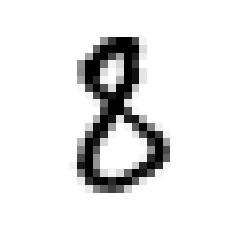

In [5]:
array=dff.loc[5340].to_numpy()
array = np.reshape(array, (28, 28))
plt.imshow(array,cmap=plt.cm.binary)
plt.axis("off")


(-0.5, 27.5, 27.5, -0.5)

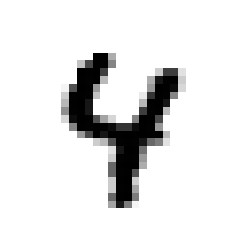

In [6]:
array=dff.loc[2511].to_numpy()
array = np.reshape(array, (28, 28))
plt.imshow(array,cmap=plt.cm.binary)
plt.axis("off")


(-0.5, 27.5, 27.5, -0.5)

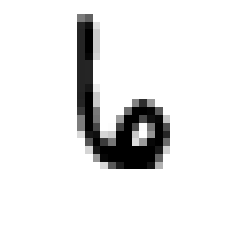

In [7]:
array=dff.loc[123].to_numpy()
array = np.reshape(array, (28, 28))
plt.imshow(array,cmap=plt.cm.binary)
plt.axis("off")


(-0.5, 27.5, 27.5, -0.5)

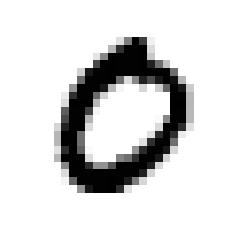

In [8]:
array=dff.loc[819].to_numpy()
array = np.reshape(array, (28, 28))
plt.imshow(array,cmap=plt.cm.binary)
plt.axis("off")


### Create the data with label

In [9]:
def create_label(image_name):
    """ Create an one-hot encoded vector from image name """ 
    if image_name == '0':  
        return np.array([1,0,0,0,0,0,0,0,0,0])
    elif image_name == '1':
        return np.array([0,1,0,0,0,0,0,0,0,0])
    elif image_name == '2':
        return np.array([0,0,1,0,0,0,0,0,0,0])
    elif image_name == '3':
        return np.array([0,0,0,1,0,0,0,0,0,0])
    elif image_name == '4':
        return np.array([0,0,0,0,1,0,0,0,0,0])
    elif image_name == '5':
        return np.array([0,0,0,0,0,1,0,0,0,0])
    elif image_name == '6':
        return np.array([0,0,0,0,0,0,1,0,0,0])
    elif image_name == '7':
        return np.array([0,0,0,0,0,0,0,1,0,0])
    elif image_name == '8':
        return np.array([0,0,0,0,0,0,0,0,1,0])
    elif image_name == '9':
        return np.array([0,0,0,0,0,0,0,0,0,1])

In [10]:
def create_data():
    data = []
    for folder in tqdm(os.listdir("captured_images")):
        for img in os.listdir("captured_images/"+folder):
            path = os.path.join("captured_images",folder, img)
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            try:
                img_data = cv2.resize(img_data, (28,28))
            except cv2.error as e:
                continue
            data.append([np.array(img_data), create_label(folder)])
    shuffle(data)
    return data

In [11]:
data = create_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.74it/s]


### Dividing data into training and testing part


In [12]:
train = data[:1600]
test = data[1600:]
X_train = np.array([i[0] for i in train]).reshape(-1, 28,28, 1)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1, 28,28, 1)
y_test = [i[1] for i in test]

### Model Building

In [13]:
## Steps of Convolutional neural network:
# 1. Convolution layers
# 2. Normalization
# 3. Pooling
# 4. Fully connected

In [14]:
# tf.reset_default_graph()
tf.compat.v1.get_default_graph()

convnet = input_data(shape=[28,28, 1], name='input') 
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8) #prevent a model from overfitting
convnet = fully_connected(convnet, 10, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy', name='targets')  
model = tflearn.DNN(convnet, tensorboard_verbose=1)  
history=model.fit({'input': X_train}, {'targets': y_train}, n_epoch=16,
          validation_set=({'input': X_test}, {'targets': y_test}),
          show_metric=True)

Training Step: 399  | total loss: 0.06853 | time: 2.626s
| Adam | epoch: 016 | loss: 0.06853 - acc: 0.9777 -- iter: 1536/1600
Training Step: 400  | total loss: 0.06649 | time: 3.718s
| Adam | epoch: 016 | loss: 0.06649 - acc: 0.9768 | val_loss: 0.18670 - val_acc: 0.9375 -- iter: 1600/1600
--


### Prediction

In [15]:
def create_test_data():
    data = []
    for img in tqdm(os.listdir("new_images")):
        path = os.path.join("new_images", img)
        img_num = img.split('.')[0] ## 1.png ,2.png
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        try:
            img_data = cv2.resize(img_data, (28,28))
        except cv2.error as e:
            continue
        data.append([np.array(img_data), img_num])

    shuffle(data)
    return data

In [16]:
test_data = create_test_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 250.03it/s]


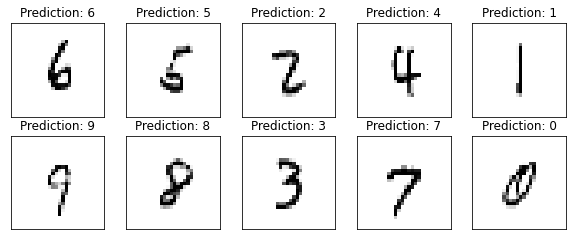

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[:10]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num + 1)
    orig = img_data
    data = img_data.reshape(28,28, 1)
    model_out = model.predict([data])
    str_label = "Prediction: " + str(np.argmax(model_out))

    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()